In [1]:
from scipy import ndimage
import pandas as pd
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [3]:
x1 = genfromtxt('data_magV_1.5.csv', delimiter=',')
x2 = genfromtxt('data_magV_1.6.csv', delimiter=',')
x3 = genfromtxt('data_magV_1.7.csv', delimiter=',')
x4 = genfromtxt('data_magV_1.8.csv', delimiter=',')
x5 = genfromtxt('data_magV_1.9.csv', delimiter=',')
x6 = genfromtxt('data_magV_2.1.csv', delimiter=',')
x7 = genfromtxt('data_magV_2.2.csv', delimiter=',')
x8 = genfromtxt('data_magV_2.3.csv', delimiter=',')
x9 = genfromtxt('data_magV_2.4.csv', delimiter=',')
x10 = genfromtxt('data_magV_2.5.csv', delimiter=',')
x11 = genfromtxt('data_magV_2.6.csv', delimiter=',')
x1 = x1.astype('float32')
x2 = x2.astype('float32')
x3 = x3.astype('float32')
x4 = x4.astype('float32')
x5 = x5.astype('float32')
x6 = x6.astype('float32')
x7 = x7.astype('float32')
x8 = x8.astype('float32')
x9 = x9.astype('float32')
x10 = x10.astype('float32')
x11 = x11.astype('float32')

x_train = np.vstack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))
x_train = np.reshape(x_train, (11, 100, 100, 1))

x_test = genfromtxt('data_magV_2.0.csv', delimiter=',')
x_test = x_test.astype('float32')
x_test = np.reshape(x_test, (1, 100, 100, 1))

In [4]:
tsr_train = np.array([1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6])
tsr_test = np.array([2.0])

tsr_train = np.reshape(tsr_train, (11, 1, 1, 1))
tsr_test = np.reshape(tsr_test, (1, 1, 1, 1))

In [5]:
input_img = tf.keras.Input(shape=(100, 100, 1), name='input_img')
input_tsr = tf.keras.Input(shape=(1, 1, 1), name='input_tsr')

x = tf.keras.layers.Conv2D(300, (3, 3), activation='tanh', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(input_img)
x = tf.keras.layers.MaxPooling2D((5, 5), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='tanh', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='tanh', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

reshape1 = tf.keras.layers.Reshape((encoded.shape[1]*encoded.shape[2]*encoded.shape[3], 1))(encoded)
reshape2 = tf.keras.layers.Reshape((input_tsr.shape[1]*input_tsr.shape[2]*input_tsr.shape[3], 1))(input_tsr)
concatt = tf.keras.layers.Concatenate(axis=1)([reshape1, reshape2])
flatten = tf.keras.layers.Flatten()(concatt)
out = tf.keras.layers.Dense(encoded.shape[1]*encoded.shape[2]*encoded.shape[3], activation='relu')(flatten)
reshape = tf.keras.layers.Reshape((encoded.shape[1], encoded.shape[2], encoded.shape[3]))(out)

x = tf.keras.layers.Conv2D(300, (3, 3), activation='tanh', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(reshape)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='tanh', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='tanh', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
x = tf.keras.layers.UpSampling2D((5, 5))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation=None, padding='same')(x)

# 오토인코더 = 인코더 + 디코더
autoencoder = tf.keras.Model([input_img, input_tsr], decoded)

In [6]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 30  3000        ['input_img[0][0]']              
                                0)                                                                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 20, 20, 300)  0           ['conv2d[0][0]']                 
                                                                                              

In [7]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                    loss = tf.keras.losses.MeanSquaredError(),
                    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
                            tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
                            tf.keras.metrics.RootMeanSquaredError(name="rmse"),
                            tf.keras.metrics.MeanSquaredLogarithmicError(name="msle")])

In [8]:
history = autoencoder.fit([x_train, tsr_train], x_train, epochs=5000, shuffle=True)

Epoch 1/5000
1/1 [==============================] - 3s 3s/step - loss: 54.9091 - mae: 7.0231 - mape: 99.2293 - rmse: 7.4091 - msle: 3.9156
Epoch 2/5000
1/1 [==============================] - 0s 52ms/step - loss: 19.9675 - mae: 3.7603 - mape: 73.3420 - rmse: 4.4668 - msle: 0.3045
Epoch 3/5000
1/1 [==============================] - 0s 48ms/step - loss: 564.9833 - mae: 23.6327 - mape: 372.1558 - rmse: 23.7691 - msle: 4.2641
Epoch 4/5000
1/1 [==============================] - 0s 48ms/step - loss: 229.8239 - mae: 14.9995 - mape: 230.9226 - rmse: 15.1594 - msle: 4.2641
Epoch 5/5000
1/1 [==============================] - 0s 49ms/step - loss: 34.0160 - mae: 5.3341 - mape: 71.7840 - rmse: 5.8310 - msle: 1.1896
Epoch 6/5000
1/1 [==============================] - 0s 49ms/step - loss: 6.9011 - mae: 2.3232 - mape: 42.7587 - rmse: 2.6241 - msle: 0.1322
Epoch 7/5000
1/1 [==============================] - 0s 51ms/step - loss: 9.6020 - mae: 2.4257 - mape: 50.9737 - rmse: 3.0962 - msle: 0.1751
Epoch 8/5

1/1 [==============================] - 0s 52ms/step - loss: 1.2144 - mae: 0.7830 - mape: 14.4931 - rmse: 1.0945 - msle: 0.0273
Epoch 60/5000
1/1 [==============================] - 0s 51ms/step - loss: 1.1971 - mae: 0.7782 - mape: 14.3336 - rmse: 1.0866 - msle: 0.0268
Epoch 61/5000
1/1 [==============================] - 0s 52ms/step - loss: 1.1824 - mae: 0.7759 - mape: 14.2192 - rmse: 1.0798 - msle: 0.0264
Epoch 62/5000
1/1 [==============================] - 0s 50ms/step - loss: 1.1698 - mae: 0.7741 - mape: 14.1614 - rmse: 1.0740 - msle: 0.0261
Epoch 63/5000
1/1 [==============================] - 0s 51ms/step - loss: 1.1593 - mae: 0.7724 - mape: 14.1687 - rmse: 1.0690 - msle: 0.0259
Epoch 64/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.1517 - mae: 0.7714 - mape: 14.2018 - rmse: 1.0655 - msle: 0.0258
Epoch 65/5000
1/1 [==============================] - 0s 49ms/step - loss: 1.1411 - mae: 0.7687 - mape: 14.1051 - rmse: 1.0605 - msle: 0.0255
Epoch 66/5000
1/1 [========

1/1 [==============================] - 0s 48ms/step - loss: 0.9381 - mae: 0.7206 - mape: 12.9465 - rmse: 0.9601 - msle: 0.0209
Epoch 118/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.9370 - mae: 0.7203 - mape: 12.9458 - rmse: 0.9594 - msle: 0.0208
Epoch 119/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.9358 - mae: 0.7196 - mape: 12.9420 - rmse: 0.9589 - msle: 0.0208
Epoch 120/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.9347 - mae: 0.7189 - mape: 12.9233 - rmse: 0.9583 - msle: 0.0208
Epoch 121/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.9337 - mae: 0.7183 - mape: 12.9023 - rmse: 0.9578 - msle: 0.0208
Epoch 122/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.9328 - mae: 0.7176 - mape: 12.8963 - rmse: 0.9572 - msle: 0.0208
Epoch 123/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.9318 - mae: 0.7172 - mape: 12.8972 - rmse: 0.9568 - msle: 0.0207
Epoch 124/5000
1/1 [=

1/1 [==============================] - 0s 47ms/step - loss: 0.8980 - mae: 0.7054 - mape: 12.7492 - rmse: 0.9389 - msle: 0.0202
Epoch 175/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8975 - mae: 0.7052 - mape: 12.7583 - rmse: 0.9387 - msle: 0.0202
Epoch 176/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8970 - mae: 0.7051 - mape: 12.7513 - rmse: 0.9384 - msle: 0.0202
Epoch 177/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8965 - mae: 0.7049 - mape: 12.7418 - rmse: 0.9381 - msle: 0.0202
Epoch 178/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8960 - mae: 0.7044 - mape: 12.7438 - rmse: 0.9379 - msle: 0.0202
Epoch 179/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8955 - mae: 0.7042 - mape: 12.7417 - rmse: 0.9376 - msle: 0.0202
Epoch 180/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8950 - mae: 0.7043 - mape: 12.7365 - rmse: 0.9373 - msle: 0.0202
Epoch 181/5000
1/1 [=

1/1 [==============================] - 0s 49ms/step - loss: 0.8746 - mae: 0.6959 - mape: 12.6194 - rmse: 0.9264 - msle: 0.0199
Epoch 232/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8744 - mae: 0.6947 - mape: 12.6526 - rmse: 0.9263 - msle: 0.0199
Epoch 233/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8739 - mae: 0.6956 - mape: 12.6137 - rmse: 0.9260 - msle: 0.0199
Epoch 234/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8733 - mae: 0.6950 - mape: 12.6383 - rmse: 0.9257 - msle: 0.0199
Epoch 235/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8730 - mae: 0.6948 - mape: 12.6407 - rmse: 0.9255 - msle: 0.0199
Epoch 236/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8726 - mae: 0.6948 - mape: 12.6073 - rmse: 0.9253 - msle: 0.0198
Epoch 237/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8726 - mae: 0.6940 - mape: 12.6357 - rmse: 0.9253 - msle: 0.0199
Epoch 238/5000
1/1 [=

1/1 [==============================] - 0s 52ms/step - loss: 0.8566 - mae: 0.6869 - mape: 12.5368 - rmse: 0.9166 - msle: 0.0197
Epoch 289/5000
1/1 [==============================] - 0s 65ms/step - loss: 0.8563 - mae: 0.6865 - mape: 12.5252 - rmse: 0.9165 - msle: 0.0196
Epoch 290/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8561 - mae: 0.6862 - mape: 12.5277 - rmse: 0.9164 - msle: 0.0196
Epoch 291/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8559 - mae: 0.6864 - mape: 12.5186 - rmse: 0.9162 - msle: 0.0196
Epoch 292/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.8556 - mae: 0.6861 - mape: 12.5380 - rmse: 0.9161 - msle: 0.0197
Epoch 293/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8554 - mae: 0.6864 - mape: 12.5160 - rmse: 0.9160 - msle: 0.0196
Epoch 294/5000
1/1 [==============================] - 0s 53ms/step - loss: 0.8551 - mae: 0.6856 - mape: 12.5330 - rmse: 0.9159 - msle: 0.0196
Epoch 295/5000
1/1 [=

1/1 [==============================] - 0s 50ms/step - loss: 0.8449 - mae: 0.6778 - mape: 12.5092 - rmse: 0.9103 - msle: 0.0196
Epoch 346/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8445 - mae: 0.6797 - mape: 12.3934 - rmse: 0.9100 - msle: 0.0194
Epoch 347/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8440 - mae: 0.6777 - mape: 12.4852 - rmse: 0.9097 - msle: 0.0196
Epoch 348/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8435 - mae: 0.6788 - mape: 12.4058 - rmse: 0.9095 - msle: 0.0194
Epoch 349/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.8432 - mae: 0.6776 - mape: 12.4539 - rmse: 0.9093 - msle: 0.0195
Epoch 350/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8428 - mae: 0.6781 - mape: 12.4266 - rmse: 0.9091 - msle: 0.0195
Epoch 351/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.8426 - mae: 0.6779 - mape: 12.4313 - rmse: 0.9090 - msle: 0.0195
Epoch 352/5000
1/1 [=

1/1 [==============================] - 0s 46ms/step - loss: 0.8384 - mae: 0.6753 - mape: 12.3640 - rmse: 0.9067 - msle: 0.0194
Epoch 403/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.8394 - mae: 0.6770 - mape: 12.3330 - rmse: 0.9073 - msle: 0.0193
Epoch 404/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8380 - mae: 0.6726 - mape: 12.4611 - rmse: 0.9065 - msle: 0.0195
Epoch 405/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.8378 - mae: 0.6718 - mape: 12.4354 - rmse: 0.9064 - msle: 0.0195
Epoch 406/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8388 - mae: 0.6742 - mape: 12.2726 - rmse: 0.9069 - msle: 0.0193
Epoch 407/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8362 - mae: 0.6720 - mape: 12.3421 - rmse: 0.9055 - msle: 0.0193
Epoch 408/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8383 - mae: 0.6713 - mape: 12.4638 - rmse: 0.9066 - msle: 0.0196
Epoch 409/5000
1/1 [=

1/1 [==============================] - 0s 47ms/step - loss: 0.8313 - mae: 0.6698 - mape: 12.3098 - rmse: 0.9028 - msle: 0.0193
Epoch 460/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8313 - mae: 0.6698 - mape: 12.3242 - rmse: 0.9028 - msle: 0.0193
Epoch 461/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8317 - mae: 0.6681 - mape: 12.3812 - rmse: 0.9030 - msle: 0.0194
Epoch 462/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8310 - mae: 0.6688 - mape: 12.3084 - rmse: 0.9026 - msle: 0.0193
Epoch 463/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8306 - mae: 0.6690 - mape: 12.2874 - rmse: 0.9024 - msle: 0.0192
Epoch 464/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8307 - mae: 0.6681 - mape: 12.3553 - rmse: 0.9025 - msle: 0.0193
Epoch 465/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8309 - mae: 0.6694 - mape: 12.3430 - rmse: 0.9025 - msle: 0.0193
Epoch 466/5000
1/1 [=

1/1 [==============================] - 0s 49ms/step - loss: 0.8277 - mae: 0.6663 - mape: 12.2997 - rmse: 0.9008 - msle: 0.0193
Epoch 517/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.8277 - mae: 0.6652 - mape: 12.3224 - rmse: 0.9008 - msle: 0.0193
Epoch 518/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8275 - mae: 0.6655 - mape: 12.2667 - rmse: 0.9007 - msle: 0.0192
Epoch 519/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8273 - mae: 0.6655 - mape: 12.2742 - rmse: 0.9006 - msle: 0.0192
Epoch 520/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8275 - mae: 0.6647 - mape: 12.3295 - rmse: 0.9007 - msle: 0.0193
Epoch 521/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8275 - mae: 0.6664 - mape: 12.2747 - rmse: 0.9007 - msle: 0.0192
Epoch 522/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8273 - mae: 0.6652 - mape: 12.2780 - rmse: 0.9006 - msle: 0.0192
Epoch 523/5000
1/1 [=

1/1 [==============================] - 0s 50ms/step - loss: 0.8249 - mae: 0.6630 - mape: 12.2657 - rmse: 0.8993 - msle: 0.0192
Epoch 574/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8248 - mae: 0.6629 - mape: 12.2642 - rmse: 0.8992 - msle: 0.0192
Epoch 575/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8248 - mae: 0.6628 - mape: 12.2661 - rmse: 0.8992 - msle: 0.0192
Epoch 576/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8247 - mae: 0.6628 - mape: 12.2612 - rmse: 0.8992 - msle: 0.0192
Epoch 577/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8247 - mae: 0.6627 - mape: 12.2652 - rmse: 0.8992 - msle: 0.0192
Epoch 578/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.8247 - mae: 0.6627 - mape: 12.2644 - rmse: 0.8991 - msle: 0.0192
Epoch 579/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8246 - mae: 0.6627 - mape: 12.2615 - rmse: 0.8991 - msle: 0.0192
Epoch 580/5000
1/1 [=

1/1 [==============================] - 0s 49ms/step - loss: 0.8226 - mae: 0.6606 - mape: 12.2439 - rmse: 0.8980 - msle: 0.0192
Epoch 631/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8226 - mae: 0.6608 - mape: 12.2464 - rmse: 0.8980 - msle: 0.0192
Epoch 632/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8226 - mae: 0.6606 - mape: 12.2453 - rmse: 0.8980 - msle: 0.0192
Epoch 633/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8224 - mae: 0.6604 - mape: 12.2351 - rmse: 0.8979 - msle: 0.0192
Epoch 634/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8223 - mae: 0.6604 - mape: 12.2359 - rmse: 0.8979 - msle: 0.0192
Epoch 635/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8222 - mae: 0.6602 - mape: 12.2409 - rmse: 0.8978 - msle: 0.0192
Epoch 636/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8222 - mae: 0.6607 - mape: 12.2307 - rmse: 0.8978 - msle: 0.0192
Epoch 637/5000
1/1 [=

1/1 [==============================] - 0s 50ms/step - loss: 0.8268 - mae: 0.6576 - mape: 12.4069 - rmse: 0.9004 - msle: 0.0196
Epoch 688/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8269 - mae: 0.6642 - mape: 12.1012 - rmse: 0.9004 - msle: 0.0190
Epoch 689/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8257 - mae: 0.6574 - mape: 12.3828 - rmse: 0.8997 - msle: 0.0195
Epoch 690/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8240 - mae: 0.6622 - mape: 12.1237 - rmse: 0.8988 - msle: 0.0191
Epoch 691/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8220 - mae: 0.6574 - mape: 12.2972 - rmse: 0.8977 - msle: 0.0193
Epoch 692/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8208 - mae: 0.6590 - mape: 12.1916 - rmse: 0.8971 - msle: 0.0191
Epoch 693/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8207 - mae: 0.6589 - mape: 12.1963 - rmse: 0.8970 - msle: 0.0191
Epoch 694/5000
1/1 [=

1/1 [==============================] - 0s 49ms/step - loss: 0.8198 - mae: 0.6579 - mape: 12.1675 - rmse: 0.8965 - msle: 0.0191
Epoch 745/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8195 - mae: 0.6570 - mape: 12.2042 - rmse: 0.8963 - msle: 0.0192
Epoch 746/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8196 - mae: 0.6566 - mape: 12.2288 - rmse: 0.8964 - msle: 0.0192
Epoch 747/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8200 - mae: 0.6584 - mape: 12.1606 - rmse: 0.8966 - msle: 0.0191
Epoch 748/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8203 - mae: 0.6562 - mape: 12.2662 - rmse: 0.8968 - msle: 0.0193
Epoch 749/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8202 - mae: 0.6586 - mape: 12.1481 - rmse: 0.8968 - msle: 0.0191
Epoch 750/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8199 - mae: 0.6561 - mape: 12.2527 - rmse: 0.8966 - msle: 0.0193
Epoch 751/5000
1/1 [=

1/1 [==============================] - 0s 46ms/step - loss: 0.8199 - mae: 0.6558 - mape: 12.2530 - rmse: 0.8966 - msle: 0.0193
Epoch 802/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8295 - mae: 0.6646 - mape: 12.0601 - rmse: 0.9019 - msle: 0.0191
Epoch 803/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8282 - mae: 0.6554 - mape: 12.4188 - rmse: 0.9012 - msle: 0.0197
Epoch 804/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8199 - mae: 0.6572 - mape: 12.1324 - rmse: 0.8966 - msle: 0.0191
Epoch 805/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8219 - mae: 0.6592 - mape: 12.1008 - rmse: 0.8977 - msle: 0.0190
Epoch 806/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8258 - mae: 0.6556 - mape: 12.4048 - rmse: 0.8999 - msle: 0.0196
Epoch 807/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8212 - mae: 0.6592 - mape: 12.1173 - rmse: 0.8973 - msle: 0.0190
Epoch 808/5000
1/1 [=

1/1 [==============================] - 0s 51ms/step - loss: 0.8172 - mae: 0.6546 - mape: 12.1709 - rmse: 0.8951 - msle: 0.0191
Epoch 859/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.8172 - mae: 0.6543 - mape: 12.1855 - rmse: 0.8951 - msle: 0.0192
Epoch 860/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8171 - mae: 0.6547 - mape: 12.1633 - rmse: 0.8951 - msle: 0.0191
Epoch 861/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.8171 - mae: 0.6543 - mape: 12.1792 - rmse: 0.8951 - msle: 0.0191
Epoch 862/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8171 - mae: 0.6544 - mape: 12.1753 - rmse: 0.8950 - msle: 0.0191
Epoch 863/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8171 - mae: 0.6546 - mape: 12.1659 - rmse: 0.8950 - msle: 0.0191
Epoch 864/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.8170 - mae: 0.6542 - mape: 12.1832 - rmse: 0.8950 - msle: 0.0192
Epoch 865/5000
1/1 [=

1/1 [==============================] - 0s 50ms/step - loss: 0.8161 - mae: 0.6534 - mape: 12.1635 - rmse: 0.8945 - msle: 0.0191
Epoch 916/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.8160 - mae: 0.6534 - mape: 12.1630 - rmse: 0.8945 - msle: 0.0191
Epoch 917/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.8160 - mae: 0.6534 - mape: 12.1626 - rmse: 0.8945 - msle: 0.0191
Epoch 918/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.8160 - mae: 0.6534 - mape: 12.1632 - rmse: 0.8945 - msle: 0.0191
Epoch 919/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8160 - mae: 0.6534 - mape: 12.1619 - rmse: 0.8945 - msle: 0.0191
Epoch 920/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8160 - mae: 0.6534 - mape: 12.1630 - rmse: 0.8945 - msle: 0.0191
Epoch 921/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8160 - mae: 0.6534 - mape: 12.1615 - rmse: 0.8945 - msle: 0.0191
Epoch 922/5000
1/1 [=

1/1 [==============================] - 0s 47ms/step - loss: 0.8200 - mae: 0.6518 - mape: 12.3056 - rmse: 0.8967 - msle: 0.0194
Epoch 973/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8168 - mae: 0.6549 - mape: 12.1120 - rmse: 0.8950 - msle: 0.0190
Epoch 974/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8163 - mae: 0.6545 - mape: 12.1256 - rmse: 0.8947 - msle: 0.0191
Epoch 975/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8185 - mae: 0.6524 - mape: 12.2830 - rmse: 0.8959 - msle: 0.0194
Epoch 976/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8176 - mae: 0.6551 - mape: 12.0663 - rmse: 0.8954 - msle: 0.0190
Epoch 977/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8156 - mae: 0.6530 - mape: 12.1620 - rmse: 0.8943 - msle: 0.0191
Epoch 978/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8168 - mae: 0.6524 - mape: 12.2425 - rmse: 0.8950 - msle: 0.0193
Epoch 979/5000
1/1 [=

1/1 [==============================] - 0s 47ms/step - loss: 0.8147 - mae: 0.6522 - mape: 12.1270 - rmse: 0.8938 - msle: 0.0191
Epoch 1030/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8147 - mae: 0.6515 - mape: 12.1649 - rmse: 0.8938 - msle: 0.0191
Epoch 1031/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8146 - mae: 0.6518 - mape: 12.1398 - rmse: 0.8937 - msle: 0.0191
Epoch 1032/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8146 - mae: 0.6520 - mape: 12.1340 - rmse: 0.8937 - msle: 0.0191
Epoch 1033/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8145 - mae: 0.6516 - mape: 12.1661 - rmse: 0.8937 - msle: 0.0191
Epoch 1034/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8147 - mae: 0.6524 - mape: 12.1369 - rmse: 0.8938 - msle: 0.0191
Epoch 1035/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8145 - mae: 0.6513 - mape: 12.1601 - rmse: 0.8937 - msle: 0.0191
Epoch 1036/5000

1/1 [==============================] - 0s 47ms/step - loss: 0.8143 - mae: 0.6508 - mape: 12.1855 - rmse: 0.8936 - msle: 0.0192
Epoch 1087/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8145 - mae: 0.6505 - mape: 12.1899 - rmse: 0.8937 - msle: 0.0192
Epoch 1088/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8161 - mae: 0.6536 - mape: 12.0465 - rmse: 0.8946 - msle: 0.0190
Epoch 1089/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8148 - mae: 0.6504 - mape: 12.2075 - rmse: 0.8939 - msle: 0.0192
Epoch 1090/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8140 - mae: 0.6508 - mape: 12.1574 - rmse: 0.8934 - msle: 0.0191
Epoch 1091/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8153 - mae: 0.6532 - mape: 12.0680 - rmse: 0.8942 - msle: 0.0190
Epoch 1092/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8151 - mae: 0.6501 - mape: 12.2137 - rmse: 0.8940 - msle: 0.0192
Epoch 1093/5000

1/1 [==============================] - 0s 49ms/step - loss: 0.8365 - mae: 0.6640 - mape: 11.9618 - rmse: 0.9060 - msle: 0.0191
Epoch 1144/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8189 - mae: 0.6533 - mape: 12.2469 - rmse: 0.8962 - msle: 0.0193
Epoch 1145/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8263 - mae: 0.6538 - mape: 12.4472 - rmse: 0.9003 - msle: 0.0198
Epoch 1146/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.8312 - mae: 0.6636 - mape: 11.9951 - rmse: 0.9030 - msle: 0.0191
Epoch 1147/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8173 - mae: 0.6511 - mape: 12.1955 - rmse: 0.8953 - msle: 0.0193
Epoch 1148/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8224 - mae: 0.6520 - mape: 12.3276 - rmse: 0.8982 - msle: 0.0195
Epoch 1149/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8255 - mae: 0.6598 - mape: 12.0039 - rmse: 0.8999 - msle: 0.0190
Epoch 1150/5000

1/1 [==============================] - 0s 49ms/step - loss: 0.8128 - mae: 0.6506 - mape: 12.1210 - rmse: 0.8929 - msle: 0.0191
Epoch 1201/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8129 - mae: 0.6498 - mape: 12.1523 - rmse: 0.8929 - msle: 0.0191
Epoch 1202/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8128 - mae: 0.6501 - mape: 12.1150 - rmse: 0.8928 - msle: 0.0191
Epoch 1203/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8128 - mae: 0.6499 - mape: 12.1079 - rmse: 0.8928 - msle: 0.0191
Epoch 1204/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8127 - mae: 0.6497 - mape: 12.1384 - rmse: 0.8928 - msle: 0.0191
Epoch 1205/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8127 - mae: 0.6501 - mape: 12.1281 - rmse: 0.8928 - msle: 0.0191
Epoch 1206/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8127 - mae: 0.6501 - mape: 12.1187 - rmse: 0.8928 - msle: 0.0191
Epoch 1207/5000

1/1 [==============================] - 0s 50ms/step - loss: 0.8120 - mae: 0.6496 - mape: 12.1210 - rmse: 0.8924 - msle: 0.0191
Epoch 1258/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8120 - mae: 0.6494 - mape: 12.1158 - rmse: 0.8924 - msle: 0.0191
Epoch 1259/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8120 - mae: 0.6491 - mape: 12.1254 - rmse: 0.8924 - msle: 0.0191
Epoch 1260/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8119 - mae: 0.6494 - mape: 12.1067 - rmse: 0.8924 - msle: 0.0191
Epoch 1261/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8119 - mae: 0.6491 - mape: 12.1159 - rmse: 0.8924 - msle: 0.0191
Epoch 1262/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8120 - mae: 0.6492 - mape: 12.1266 - rmse: 0.8924 - msle: 0.0191
Epoch 1263/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8120 - mae: 0.6496 - mape: 12.1029 - rmse: 0.8924 - msle: 0.0191
Epoch 1264/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8115 - mae: 0.6486 - mape: 12.1232 - rmse: 0.8922 - msle: 0.0191
Epoch 1315/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8115 - mae: 0.6487 - mape: 12.1183 - rmse: 0.8922 - msle: 0.0191
Epoch 1316/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8116 - mae: 0.6493 - mape: 12.0902 - rmse: 0.8922 - msle: 0.0190
Epoch 1317/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8116 - mae: 0.6484 - mape: 12.1369 - rmse: 0.8922 - msle: 0.0191
Epoch 1318/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8115 - mae: 0.6492 - mape: 12.0904 - rmse: 0.8922 - msle: 0.0190
Epoch 1319/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8114 - mae: 0.6486 - mape: 12.1197 - rmse: 0.8921 - msle: 0.0191
Epoch 1320/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.8114 - mae: 0.6487 - mape: 12.1165 - rmse: 0.8921 - msle: 0.0191
Epoch 1321/5000

1/1 [==============================] - 0s 47ms/step - loss: 0.8110 - mae: 0.6484 - mape: 12.1116 - rmse: 0.8919 - msle: 0.0191
Epoch 1372/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8110 - mae: 0.6485 - mape: 12.1068 - rmse: 0.8919 - msle: 0.0191
Epoch 1373/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.8110 - mae: 0.6485 - mape: 12.1078 - rmse: 0.8919 - msle: 0.0191
Epoch 1374/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8110 - mae: 0.6485 - mape: 12.1113 - rmse: 0.8919 - msle: 0.0191
Epoch 1375/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8109 - mae: 0.6486 - mape: 12.1048 - rmse: 0.8919 - msle: 0.0191
Epoch 1376/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8109 - mae: 0.6484 - mape: 12.1134 - rmse: 0.8919 - msle: 0.0191
Epoch 1377/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8109 - mae: 0.6486 - mape: 12.1030 - rmse: 0.8919 - msle: 0.0191
Epoch 1378/5000

1/1 [==============================] - 0s 46ms/step - loss: 0.8117 - mae: 0.6476 - mape: 12.1764 - rmse: 0.8923 - msle: 0.0192
Epoch 1429/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8109 - mae: 0.6478 - mape: 12.1241 - rmse: 0.8919 - msle: 0.0191
Epoch 1430/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8125 - mae: 0.6501 - mape: 12.0229 - rmse: 0.8928 - msle: 0.0190
Epoch 1431/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8135 - mae: 0.6473 - mape: 12.2317 - rmse: 0.8933 - msle: 0.0193
Epoch 1432/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8124 - mae: 0.6503 - mape: 12.0275 - rmse: 0.8928 - msle: 0.0190
Epoch 1433/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8109 - mae: 0.6476 - mape: 12.1318 - rmse: 0.8919 - msle: 0.0191
Epoch 1434/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.8110 - mae: 0.6475 - mape: 12.1408 - rmse: 0.8920 - msle: 0.0191
Epoch 1435/5000

1/1 [==============================] - 0s 45ms/step - loss: 0.8102 - mae: 0.6477 - mape: 12.1070 - rmse: 0.8915 - msle: 0.0191
Epoch 1486/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8101 - mae: 0.6479 - mape: 12.0938 - rmse: 0.8915 - msle: 0.0190
Epoch 1487/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8101 - mae: 0.6476 - mape: 12.1086 - rmse: 0.8915 - msle: 0.0191
Epoch 1488/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8101 - mae: 0.6479 - mape: 12.0930 - rmse: 0.8915 - msle: 0.0190
Epoch 1489/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8101 - mae: 0.6477 - mape: 12.1065 - rmse: 0.8915 - msle: 0.0191
Epoch 1490/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8101 - mae: 0.6478 - mape: 12.0968 - rmse: 0.8915 - msle: 0.0190
Epoch 1491/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8101 - mae: 0.6477 - mape: 12.1025 - rmse: 0.8915 - msle: 0.0191
Epoch 1492/5000

1/1 [==============================] - 0s 47ms/step - loss: 0.8101 - mae: 0.6473 - mape: 12.0975 - rmse: 0.8915 - msle: 0.0191
Epoch 1543/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8131 - mae: 0.6503 - mape: 11.9950 - rmse: 0.8932 - msle: 0.0189
Epoch 1544/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8169 - mae: 0.6475 - mape: 12.3171 - rmse: 0.8954 - msle: 0.0195
Epoch 1545/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8168 - mae: 0.6533 - mape: 11.9684 - rmse: 0.8953 - msle: 0.0189
Epoch 1546/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8123 - mae: 0.6470 - mape: 12.2162 - rmse: 0.8928 - msle: 0.0193
Epoch 1547/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8100 - mae: 0.6475 - mape: 12.0986 - rmse: 0.8915 - msle: 0.0191
Epoch 1548/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8118 - mae: 0.6496 - mape: 12.0135 - rmse: 0.8925 - msle: 0.0189
Epoch 1549/5000

1/1 [==============================] - 0s 46ms/step - loss: 0.8098 - mae: 0.6470 - mape: 12.1317 - rmse: 0.8914 - msle: 0.0191
Epoch 1600/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8096 - mae: 0.6476 - mape: 12.0721 - rmse: 0.8913 - msle: 0.0190
Epoch 1601/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8095 - mae: 0.6471 - mape: 12.0970 - rmse: 0.8912 - msle: 0.0190
Epoch 1602/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8095 - mae: 0.6470 - mape: 12.1078 - rmse: 0.8912 - msle: 0.0191
Epoch 1603/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8096 - mae: 0.6476 - mape: 12.0726 - rmse: 0.8913 - msle: 0.0190
Epoch 1604/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8097 - mae: 0.6466 - mape: 12.1220 - rmse: 0.8913 - msle: 0.0191
Epoch 1605/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8096 - mae: 0.6476 - mape: 12.0630 - rmse: 0.8913 - msle: 0.0190
Epoch 1606/5000

1/1 [==============================] - 0s 47ms/step - loss: 0.8104 - mae: 0.6489 - mape: 12.0270 - rmse: 0.8918 - msle: 0.0189
Epoch 1657/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8107 - mae: 0.6464 - mape: 12.1893 - rmse: 0.8919 - msle: 0.0192
Epoch 1658/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8109 - mae: 0.6492 - mape: 12.0117 - rmse: 0.8921 - msle: 0.0189
Epoch 1659/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8112 - mae: 0.6461 - mape: 12.1958 - rmse: 0.8922 - msle: 0.0192
Epoch 1660/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8114 - mae: 0.6495 - mape: 12.0013 - rmse: 0.8924 - msle: 0.0189
Epoch 1661/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8116 - mae: 0.6463 - mape: 12.2151 - rmse: 0.8924 - msle: 0.0193
Epoch 1662/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8116 - mae: 0.6498 - mape: 12.0030 - rmse: 0.8925 - msle: 0.0189
Epoch 1663/5000

1/1 [==============================] - 0s 46ms/step - loss: 0.8089 - mae: 0.6465 - mape: 12.1114 - rmse: 0.8910 - msle: 0.0191
Epoch 1714/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8090 - mae: 0.6472 - mape: 12.0624 - rmse: 0.8910 - msle: 0.0190
Epoch 1715/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8091 - mae: 0.6463 - mape: 12.1247 - rmse: 0.8911 - msle: 0.0191
Epoch 1716/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.8092 - mae: 0.6476 - mape: 12.0479 - rmse: 0.8911 - msle: 0.0190
Epoch 1717/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8095 - mae: 0.6461 - mape: 12.1496 - rmse: 0.8913 - msle: 0.0191
Epoch 1718/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.8100 - mae: 0.6484 - mape: 12.0230 - rmse: 0.8916 - msle: 0.0189
Epoch 1719/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8107 - mae: 0.6461 - mape: 12.1955 - rmse: 0.8920 - msle: 0.0192
Epoch 1720/5000

1/1 [==============================] - 0s 47ms/step - loss: 0.8163 - mae: 0.6468 - mape: 12.2620 - rmse: 0.8952 - msle: 0.0194
Epoch 1771/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8160 - mae: 0.6514 - mape: 11.9497 - rmse: 0.8950 - msle: 0.0189
Epoch 1772/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8140 - mae: 0.6468 - mape: 12.2835 - rmse: 0.8939 - msle: 0.0194
Epoch 1773/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8112 - mae: 0.6497 - mape: 12.0426 - rmse: 0.8923 - msle: 0.0190
Epoch 1774/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8095 - mae: 0.6463 - mape: 12.1026 - rmse: 0.8913 - msle: 0.0191
Epoch 1775/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8099 - mae: 0.6458 - mape: 12.1183 - rmse: 0.8916 - msle: 0.0191
Epoch 1776/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8113 - mae: 0.6489 - mape: 12.0012 - rmse: 0.8923 - msle: 0.0189
Epoch 1777/5000

1/1 [==============================] - 0s 47ms/step - loss: 0.8090 - mae: 0.6477 - mape: 12.1026 - rmse: 0.8911 - msle: 0.0190
Epoch 1828/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8128 - mae: 0.6474 - mape: 12.2436 - rmse: 0.8932 - msle: 0.0193
Epoch 1829/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8131 - mae: 0.6501 - mape: 11.9665 - rmse: 0.8934 - msle: 0.0189
Epoch 1830/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8091 - mae: 0.6463 - mape: 12.1126 - rmse: 0.8911 - msle: 0.0191
Epoch 1831/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8110 - mae: 0.6458 - mape: 12.2061 - rmse: 0.8922 - msle: 0.0193
Epoch 1832/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8125 - mae: 0.6508 - mape: 12.0034 - rmse: 0.8931 - msle: 0.0189
Epoch 1833/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8094 - mae: 0.6453 - mape: 12.1358 - rmse: 0.8913 - msle: 0.0191
Epoch 1834/5000

1/1 [==============================] - 0s 47ms/step - loss: 0.8082 - mae: 0.6466 - mape: 12.0679 - rmse: 0.8907 - msle: 0.0190
Epoch 1885/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8082 - mae: 0.6462 - mape: 12.1028 - rmse: 0.8907 - msle: 0.0191
Epoch 1886/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8081 - mae: 0.6463 - mape: 12.0823 - rmse: 0.8906 - msle: 0.0190
Epoch 1887/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8081 - mae: 0.6464 - mape: 12.0712 - rmse: 0.8906 - msle: 0.0190
Epoch 1888/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8081 - mae: 0.6460 - mape: 12.0981 - rmse: 0.8906 - msle: 0.0191
Epoch 1889/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8081 - mae: 0.6463 - mape: 12.0758 - rmse: 0.8906 - msle: 0.0190
Epoch 1890/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8081 - mae: 0.6462 - mape: 12.0812 - rmse: 0.8906 - msle: 0.0190
Epoch 1891/5000

1/1 [==============================] - 0s 47ms/step - loss: 0.8079 - mae: 0.6460 - mape: 12.0819 - rmse: 0.8905 - msle: 0.0190
Epoch 1942/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.8079 - mae: 0.6460 - mape: 12.0719 - rmse: 0.8905 - msle: 0.0190
Epoch 1943/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.8079 - mae: 0.6460 - mape: 12.0867 - rmse: 0.8905 - msle: 0.0190
Epoch 1944/5000
1/1 [==============================] - 0s 45ms/step - loss: 0.8078 - mae: 0.6462 - mape: 12.0849 - rmse: 0.8905 - msle: 0.0190
Epoch 1945/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8078 - mae: 0.6461 - mape: 12.0822 - rmse: 0.8905 - msle: 0.0190
Epoch 1946/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8077 - mae: 0.6457 - mape: 12.0833 - rmse: 0.8904 - msle: 0.0190
Epoch 1947/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8080 - mae: 0.6459 - mape: 12.0708 - rmse: 0.8906 - msle: 0.0190
Epoch 1948/5000

1/1 [==============================] - 0s 46ms/step - loss: 0.8078 - mae: 0.6456 - mape: 12.1075 - rmse: 0.8905 - msle: 0.0191
Epoch 1999/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8078 - mae: 0.6462 - mape: 12.0572 - rmse: 0.8905 - msle: 0.0190
Epoch 2000/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8077 - mae: 0.6455 - mape: 12.0928 - rmse: 0.8905 - msle: 0.0190
Epoch 2001/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8077 - mae: 0.6461 - mape: 12.0658 - rmse: 0.8905 - msle: 0.0190
Epoch 2002/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8076 - mae: 0.6462 - mape: 12.0844 - rmse: 0.8904 - msle: 0.0190
Epoch 2003/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8076 - mae: 0.6461 - mape: 12.0969 - rmse: 0.8904 - msle: 0.0190
Epoch 2004/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8074 - mae: 0.6462 - mape: 12.0702 - rmse: 0.8903 - msle: 0.0190
Epoch 2005/5000

1/1 [==============================] - 0s 47ms/step - loss: 0.8079 - mae: 0.6469 - mape: 12.0422 - rmse: 0.8906 - msle: 0.0190
Epoch 2056/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8078 - mae: 0.6457 - mape: 12.1300 - rmse: 0.8906 - msle: 0.0191
Epoch 2057/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8076 - mae: 0.6465 - mape: 12.0540 - rmse: 0.8905 - msle: 0.0190
Epoch 2058/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8074 - mae: 0.6457 - mape: 12.0896 - rmse: 0.8904 - msle: 0.0190
Epoch 2059/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8074 - mae: 0.6457 - mape: 12.0832 - rmse: 0.8903 - msle: 0.0190
Epoch 2060/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8075 - mae: 0.6462 - mape: 12.0613 - rmse: 0.8904 - msle: 0.0190
Epoch 2061/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8075 - mae: 0.6455 - mape: 12.1128 - rmse: 0.8904 - msle: 0.0191
Epoch 2062/5000

1/1 [==============================] - 0s 47ms/step - loss: 0.8108 - mae: 0.6455 - mape: 12.2319 - rmse: 0.8923 - msle: 0.0193
Epoch 2113/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8094 - mae: 0.6478 - mape: 11.9863 - rmse: 0.8915 - msle: 0.0189
Epoch 2114/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8079 - mae: 0.6452 - mape: 12.1395 - rmse: 0.8907 - msle: 0.0191
Epoch 2115/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8072 - mae: 0.6458 - mape: 12.0695 - rmse: 0.8903 - msle: 0.0190
Epoch 2116/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8074 - mae: 0.6463 - mape: 12.0449 - rmse: 0.8904 - msle: 0.0190
Epoch 2117/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8082 - mae: 0.6451 - mape: 12.1522 - rmse: 0.8908 - msle: 0.0191
Epoch 2118/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8088 - mae: 0.6475 - mape: 11.9978 - rmse: 0.8912 - msle: 0.0189
Epoch 2119/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8077 - mae: 0.6468 - mape: 12.0224 - rmse: 0.8906 - msle: 0.0189
Epoch 2170/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8080 - mae: 0.6450 - mape: 12.1549 - rmse: 0.8908 - msle: 0.0192
Epoch 2171/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8086 - mae: 0.6474 - mape: 11.9959 - rmse: 0.8911 - msle: 0.0189
Epoch 2172/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8093 - mae: 0.6451 - mape: 12.1978 - rmse: 0.8915 - msle: 0.0192
Epoch 2173/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8104 - mae: 0.6489 - mape: 11.9730 - rmse: 0.8921 - msle: 0.0189
Epoch 2174/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8117 - mae: 0.6456 - mape: 12.2581 - rmse: 0.8928 - msle: 0.0194
Epoch 2175/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8135 - mae: 0.6507 - mape: 11.9386 - rmse: 0.8939 - msle: 0.0189
Epoch 2176/5000

1/1 [==============================] - 0s 50ms/step - loss: 0.8068 - mae: 0.6458 - mape: 12.0559 - rmse: 0.8901 - msle: 0.0190
Epoch 2227/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8068 - mae: 0.6452 - mape: 12.0954 - rmse: 0.8901 - msle: 0.0190
Epoch 2228/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8068 - mae: 0.6457 - mape: 12.0573 - rmse: 0.8901 - msle: 0.0190
Epoch 2229/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8067 - mae: 0.6453 - mape: 12.0906 - rmse: 0.8901 - msle: 0.0190
Epoch 2230/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8067 - mae: 0.6456 - mape: 12.0632 - rmse: 0.8901 - msle: 0.0190
Epoch 2231/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8067 - mae: 0.6453 - mape: 12.0820 - rmse: 0.8901 - msle: 0.0190
Epoch 2232/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8067 - mae: 0.6455 - mape: 12.0717 - rmse: 0.8901 - msle: 0.0190
Epoch 2233/5000

1/1 [==============================] - 0s 49ms/step - loss: 0.8070 - mae: 0.6456 - mape: 12.0766 - rmse: 0.8903 - msle: 0.0190
Epoch 2284/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8096 - mae: 0.6481 - mape: 11.9805 - rmse: 0.8917 - msle: 0.0189
Epoch 2285/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.8122 - mae: 0.6457 - mape: 12.2675 - rmse: 0.8932 - msle: 0.0194
Epoch 2286/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8099 - mae: 0.6483 - mape: 11.9700 - rmse: 0.8919 - msle: 0.0189
Epoch 2287/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8070 - mae: 0.6455 - mape: 12.1001 - rmse: 0.8903 - msle: 0.0191
Epoch 2288/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8082 - mae: 0.6452 - mape: 12.1711 - rmse: 0.8910 - msle: 0.0192
Epoch 2289/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8101 - mae: 0.6485 - mape: 11.9719 - rmse: 0.8920 - msle: 0.0189
Epoch 2290/5000

1/1 [==============================] - 0s 50ms/step - loss: 0.8065 - mae: 0.6451 - mape: 12.0881 - rmse: 0.8901 - msle: 0.0190
Epoch 2341/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8065 - mae: 0.6454 - mape: 12.0606 - rmse: 0.8900 - msle: 0.0190
Epoch 2342/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8064 - mae: 0.6453 - mape: 12.0779 - rmse: 0.8900 - msle: 0.0190
Epoch 2343/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8064 - mae: 0.6453 - mape: 12.0786 - rmse: 0.8900 - msle: 0.0190
Epoch 2344/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8065 - mae: 0.6455 - mape: 12.0624 - rmse: 0.8900 - msle: 0.0190
Epoch 2345/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8065 - mae: 0.6452 - mape: 12.0855 - rmse: 0.8900 - msle: 0.0190
Epoch 2346/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8064 - mae: 0.6454 - mape: 12.0641 - rmse: 0.8900 - msle: 0.0190
Epoch 2347/5000

1/1 [==============================] - 0s 49ms/step - loss: 0.8072 - mae: 0.6447 - mape: 12.1387 - rmse: 0.8905 - msle: 0.0191
Epoch 2398/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8081 - mae: 0.6473 - mape: 11.9924 - rmse: 0.8910 - msle: 0.0189
Epoch 2399/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8084 - mae: 0.6451 - mape: 12.1957 - rmse: 0.8912 - msle: 0.0192
Epoch 2400/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8080 - mae: 0.6472 - mape: 11.9920 - rmse: 0.8909 - msle: 0.0189
Epoch 2401/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8072 - mae: 0.6447 - mape: 12.1407 - rmse: 0.8905 - msle: 0.0191
Epoch 2402/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8065 - mae: 0.6455 - mape: 12.0345 - rmse: 0.8901 - msle: 0.0190
Epoch 2403/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8062 - mae: 0.6451 - mape: 12.0687 - rmse: 0.8900 - msle: 0.0190
Epoch 2404/5000

1/1 [==============================] - 0s 49ms/step - loss: 0.8061 - mae: 0.6449 - mape: 12.0894 - rmse: 0.8899 - msle: 0.0190
Epoch 2455/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8061 - mae: 0.6455 - mape: 12.0534 - rmse: 0.8899 - msle: 0.0190
Epoch 2456/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8062 - mae: 0.6449 - mape: 12.0966 - rmse: 0.8900 - msle: 0.0190
Epoch 2457/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8062 - mae: 0.6455 - mape: 12.0445 - rmse: 0.8900 - msle: 0.0190
Epoch 2458/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8062 - mae: 0.6448 - mape: 12.1008 - rmse: 0.8900 - msle: 0.0191
Epoch 2459/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8063 - mae: 0.6456 - mape: 12.0403 - rmse: 0.8900 - msle: 0.0190
Epoch 2460/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8063 - mae: 0.6448 - mape: 12.1119 - rmse: 0.8900 - msle: 0.0191
Epoch 2461/5000

1/1 [==============================] - 0s 50ms/step - loss: 0.8059 - mae: 0.6451 - mape: 12.0615 - rmse: 0.8899 - msle: 0.0190
Epoch 2512/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8059 - mae: 0.6449 - mape: 12.0798 - rmse: 0.8899 - msle: 0.0190
Epoch 2513/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8059 - mae: 0.6452 - mape: 12.0581 - rmse: 0.8899 - msle: 0.0190
Epoch 2514/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8059 - mae: 0.6450 - mape: 12.0823 - rmse: 0.8899 - msle: 0.0190
Epoch 2515/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8059 - mae: 0.6453 - mape: 12.0633 - rmse: 0.8899 - msle: 0.0190
Epoch 2516/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8059 - mae: 0.6451 - mape: 12.0825 - rmse: 0.8899 - msle: 0.0190
Epoch 2517/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8059 - mae: 0.6452 - mape: 12.0596 - rmse: 0.8899 - msle: 0.0190
Epoch 2518/5000

1/1 [==============================] - 0s 51ms/step - loss: 0.8062 - mae: 0.6456 - mape: 12.0280 - rmse: 0.8900 - msle: 0.0189
Epoch 2569/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8060 - mae: 0.6447 - mape: 12.1013 - rmse: 0.8899 - msle: 0.0191
Epoch 2570/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8058 - mae: 0.6452 - mape: 12.0593 - rmse: 0.8898 - msle: 0.0190
Epoch 2571/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8058 - mae: 0.6451 - mape: 12.0634 - rmse: 0.8898 - msle: 0.0190
Epoch 2572/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8059 - mae: 0.6447 - mape: 12.0920 - rmse: 0.8899 - msle: 0.0190
Epoch 2573/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8060 - mae: 0.6454 - mape: 12.0379 - rmse: 0.8899 - msle: 0.0190
Epoch 2574/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8060 - mae: 0.6446 - mape: 12.1058 - rmse: 0.8899 - msle: 0.0191
Epoch 2575/5000

1/1 [==============================] - 0s 49ms/step - loss: 0.8058 - mae: 0.6446 - mape: 12.1006 - rmse: 0.8899 - msle: 0.0191
Epoch 2626/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8059 - mae: 0.6455 - mape: 12.0322 - rmse: 0.8899 - msle: 0.0190
Epoch 2627/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8060 - mae: 0.6445 - mape: 12.1182 - rmse: 0.8900 - msle: 0.0191
Epoch 2628/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8063 - mae: 0.6459 - mape: 12.0138 - rmse: 0.8901 - msle: 0.0189
Epoch 2629/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8066 - mae: 0.6444 - mape: 12.1490 - rmse: 0.8904 - msle: 0.0191
Epoch 2630/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8073 - mae: 0.6468 - mape: 11.9863 - rmse: 0.8907 - msle: 0.0189
Epoch 2631/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8082 - mae: 0.6446 - mape: 12.2020 - rmse: 0.8913 - msle: 0.0192
Epoch 2632/5000

1/1 [==============================] - 0s 50ms/step - loss: 0.8055 - mae: 0.6447 - mape: 12.0813 - rmse: 0.8897 - msle: 0.0190
Epoch 2683/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8054 - mae: 0.6449 - mape: 12.0663 - rmse: 0.8897 - msle: 0.0190
Epoch 2684/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8055 - mae: 0.6450 - mape: 12.0604 - rmse: 0.8897 - msle: 0.0190
Epoch 2685/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8055 - mae: 0.6447 - mape: 12.0844 - rmse: 0.8898 - msle: 0.0190
Epoch 2686/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8055 - mae: 0.6451 - mape: 12.0483 - rmse: 0.8898 - msle: 0.0190
Epoch 2687/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8055 - mae: 0.6446 - mape: 12.0899 - rmse: 0.8898 - msle: 0.0190
Epoch 2688/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8055 - mae: 0.6451 - mape: 12.0496 - rmse: 0.8898 - msle: 0.0190
Epoch 2689/5000

1/1 [==============================] - 0s 47ms/step - loss: 0.8067 - mae: 0.6464 - mape: 11.9916 - rmse: 0.8905 - msle: 0.0189
Epoch 2740/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8075 - mae: 0.6444 - mape: 12.1862 - rmse: 0.8909 - msle: 0.0192
Epoch 2741/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8087 - mae: 0.6479 - mape: 11.9584 - rmse: 0.8916 - msle: 0.0189
Epoch 2742/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8103 - mae: 0.6450 - mape: 12.2583 - rmse: 0.8925 - msle: 0.0194
Epoch 2743/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8127 - mae: 0.6504 - mape: 11.9234 - rmse: 0.8938 - msle: 0.0189
Epoch 2744/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8149 - mae: 0.6464 - mape: 12.3493 - rmse: 0.8951 - msle: 0.0196
Epoch 2745/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8172 - mae: 0.6530 - mape: 11.9022 - rmse: 0.8964 - msle: 0.0189
Epoch 2746/5000

1/1 [==============================] - 0s 51ms/step - loss: 0.8052 - mae: 0.6450 - mape: 12.0465 - rmse: 0.8897 - msle: 0.0190
Epoch 2797/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8052 - mae: 0.6445 - mape: 12.0849 - rmse: 0.8897 - msle: 0.0190
Epoch 2798/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8052 - mae: 0.6449 - mape: 12.0539 - rmse: 0.8897 - msle: 0.0190
Epoch 2799/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8052 - mae: 0.6447 - mape: 12.0747 - rmse: 0.8897 - msle: 0.0190
Epoch 2800/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8051 - mae: 0.6448 - mape: 12.0649 - rmse: 0.8897 - msle: 0.0190
Epoch 2801/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8051 - mae: 0.6448 - mape: 12.0648 - rmse: 0.8897 - msle: 0.0190
Epoch 2802/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8051 - mae: 0.6447 - mape: 12.0743 - rmse: 0.8897 - msle: 0.0190
Epoch 2803/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8078 - mae: 0.6467 - mape: 11.9663 - rmse: 0.8912 - msle: 0.0189
Epoch 2854/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8107 - mae: 0.6449 - mape: 12.2624 - rmse: 0.8928 - msle: 0.0194
Epoch 2855/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8119 - mae: 0.6500 - mape: 11.9284 - rmse: 0.8935 - msle: 0.0189
Epoch 2856/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8099 - mae: 0.6457 - mape: 12.2563 - rmse: 0.8924 - msle: 0.0193
Epoch 2857/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8070 - mae: 0.6469 - mape: 11.9857 - rmse: 0.8907 - msle: 0.0189
Epoch 2858/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8053 - mae: 0.6447 - mape: 12.0847 - rmse: 0.8898 - msle: 0.0190
Epoch 2859/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8058 - mae: 0.6443 - mape: 12.1214 - rmse: 0.8901 - msle: 0.0191
Epoch 2860/5000

1/1 [==============================] - 0s 47ms/step - loss: 0.8050 - mae: 0.6445 - mape: 12.0856 - rmse: 0.8896 - msle: 0.0190
Epoch 2911/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8049 - mae: 0.6449 - mape: 12.0510 - rmse: 0.8896 - msle: 0.0190
Epoch 2912/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8049 - mae: 0.6445 - mape: 12.0764 - rmse: 0.8896 - msle: 0.0190
Epoch 2913/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8049 - mae: 0.6447 - mape: 12.0590 - rmse: 0.8896 - msle: 0.0190
Epoch 2914/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8049 - mae: 0.6447 - mape: 12.0680 - rmse: 0.8896 - msle: 0.0190
Epoch 2915/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8049 - mae: 0.6447 - mape: 12.0692 - rmse: 0.8896 - msle: 0.0190
Epoch 2916/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8049 - mae: 0.6447 - mape: 12.0592 - rmse: 0.8896 - msle: 0.0190
Epoch 2917/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8060 - mae: 0.6461 - mape: 11.9937 - rmse: 0.8903 - msle: 0.0189
Epoch 2968/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8062 - mae: 0.6442 - mape: 12.1617 - rmse: 0.8904 - msle: 0.0192
Epoch 2969/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8066 - mae: 0.6465 - mape: 11.9821 - rmse: 0.8906 - msle: 0.0189
Epoch 2970/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8069 - mae: 0.6443 - mape: 12.1818 - rmse: 0.8908 - msle: 0.0192
Epoch 2971/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8072 - mae: 0.6470 - mape: 11.9699 - rmse: 0.8910 - msle: 0.0189
Epoch 2972/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8075 - mae: 0.6444 - mape: 12.2001 - rmse: 0.8911 - msle: 0.0192
Epoch 2973/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8078 - mae: 0.6474 - mape: 11.9619 - rmse: 0.8913 - msle: 0.0189
Epoch 2974/5000

1/1 [==============================] - 0s 49ms/step - loss: 0.8059 - mae: 0.6460 - mape: 11.9941 - rmse: 0.8902 - msle: 0.0189
Epoch 3025/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8067 - mae: 0.6445 - mape: 12.1814 - rmse: 0.8907 - msle: 0.0192
Epoch 3026/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8074 - mae: 0.6473 - mape: 11.9685 - rmse: 0.8911 - msle: 0.0189
Epoch 3027/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8076 - mae: 0.6446 - mape: 12.2075 - rmse: 0.8912 - msle: 0.0193
Epoch 3028/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8074 - mae: 0.6472 - mape: 11.9651 - rmse: 0.8911 - msle: 0.0189
Epoch 3029/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8068 - mae: 0.6443 - mape: 12.1810 - rmse: 0.8908 - msle: 0.0192
Epoch 3030/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8059 - mae: 0.6460 - mape: 11.9927 - rmse: 0.8903 - msle: 0.0189
Epoch 3031/5000

1/1 [==============================] - 0s 52ms/step - loss: 0.8087 - mae: 0.6448 - mape: 12.2345 - rmse: 0.8919 - msle: 0.0193
Epoch 3082/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8097 - mae: 0.6489 - mape: 11.9391 - rmse: 0.8925 - msle: 0.0189
Epoch 3083/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8089 - mae: 0.6451 - mape: 12.2437 - rmse: 0.8920 - msle: 0.0193
Epoch 3084/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8073 - mae: 0.6472 - mape: 11.9690 - rmse: 0.8911 - msle: 0.0189
Epoch 3085/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8055 - mae: 0.6443 - mape: 12.1399 - rmse: 0.8901 - msle: 0.0191
Epoch 3086/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8046 - mae: 0.6446 - mape: 12.0481 - rmse: 0.8896 - msle: 0.0190
Epoch 3087/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8048 - mae: 0.6449 - mape: 12.0274 - rmse: 0.8897 - msle: 0.0189
Epoch 3088/5000

1/1 [==============================] - 0s 47ms/step - loss: 0.8044 - mae: 0.6447 - mape: 12.0522 - rmse: 0.8895 - msle: 0.0190
Epoch 3139/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8044 - mae: 0.6444 - mape: 12.0780 - rmse: 0.8895 - msle: 0.0190
Epoch 3140/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8044 - mae: 0.6447 - mape: 12.0502 - rmse: 0.8895 - msle: 0.0190
Epoch 3141/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8044 - mae: 0.6444 - mape: 12.0802 - rmse: 0.8895 - msle: 0.0190
Epoch 3142/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8044 - mae: 0.6447 - mape: 12.0472 - rmse: 0.8895 - msle: 0.0190
Epoch 3143/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8044 - mae: 0.6443 - mape: 12.0833 - rmse: 0.8895 - msle: 0.0190
Epoch 3144/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8044 - mae: 0.6448 - mape: 12.0446 - rmse: 0.8895 - msle: 0.0190
Epoch 3145/5000

1/1 [==============================] - 0s 49ms/step - loss: 0.8048 - mae: 0.6453 - mape: 12.0187 - rmse: 0.8898 - msle: 0.0189
Epoch 3196/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8047 - mae: 0.6442 - mape: 12.1120 - rmse: 0.8897 - msle: 0.0191
Epoch 3197/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8046 - mae: 0.6450 - mape: 12.0262 - rmse: 0.8897 - msle: 0.0189
Epoch 3198/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8044 - mae: 0.6442 - mape: 12.0955 - rmse: 0.8896 - msle: 0.0190
Epoch 3199/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8043 - mae: 0.6447 - mape: 12.0434 - rmse: 0.8895 - msle: 0.0190
Epoch 3200/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8043 - mae: 0.6444 - mape: 12.0758 - rmse: 0.8895 - msle: 0.0190
Epoch 3201/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8042 - mae: 0.6445 - mape: 12.0619 - rmse: 0.8895 - msle: 0.0190
Epoch 3202/5000

1/1 [==============================] - 0s 50ms/step - loss: 0.8043 - mae: 0.6442 - mape: 12.0955 - rmse: 0.8896 - msle: 0.0190
Epoch 3253/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8043 - mae: 0.6448 - mape: 12.0400 - rmse: 0.8895 - msle: 0.0190
Epoch 3254/5000
1/1 [==============================] - 0s 46ms/step - loss: 0.8042 - mae: 0.6443 - mape: 12.0848 - rmse: 0.8895 - msle: 0.0190
Epoch 3255/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8042 - mae: 0.6447 - mape: 12.0478 - rmse: 0.8895 - msle: 0.0190
Epoch 3256/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8042 - mae: 0.6443 - mape: 12.0774 - rmse: 0.8895 - msle: 0.0190
Epoch 3257/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8041 - mae: 0.6446 - mape: 12.0536 - rmse: 0.8895 - msle: 0.0190
Epoch 3258/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8041 - mae: 0.6444 - mape: 12.0720 - rmse: 0.8895 - msle: 0.0190
Epoch 3259/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8084 - mae: 0.6451 - mape: 12.2226 - rmse: 0.8919 - msle: 0.0193
Epoch 3310/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8046 - mae: 0.6448 - mape: 12.0546 - rmse: 0.8897 - msle: 0.0190
Epoch 3311/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8069 - mae: 0.6474 - mape: 11.9829 - rmse: 0.8911 - msle: 0.0189
Epoch 3312/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8087 - mae: 0.6453 - mape: 12.2450 - rmse: 0.8921 - msle: 0.0193
Epoch 3313/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8059 - mae: 0.6461 - mape: 11.9858 - rmse: 0.8905 - msle: 0.0189
Epoch 3314/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8045 - mae: 0.6447 - mape: 12.0350 - rmse: 0.8897 - msle: 0.0190
Epoch 3315/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8067 - mae: 0.6444 - mape: 12.1858 - rmse: 0.8909 - msle: 0.0192
Epoch 3316/5000

1/1 [==============================] - 0s 49ms/step - loss: 0.8040 - mae: 0.6446 - mape: 12.0538 - rmse: 0.8895 - msle: 0.0190
Epoch 3367/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8040 - mae: 0.6444 - mape: 12.0708 - rmse: 0.8895 - msle: 0.0190
Epoch 3368/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8039 - mae: 0.6445 - mape: 12.0621 - rmse: 0.8895 - msle: 0.0190
Epoch 3369/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8039 - mae: 0.6445 - mape: 12.0597 - rmse: 0.8895 - msle: 0.0190
Epoch 3370/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8039 - mae: 0.6443 - mape: 12.0701 - rmse: 0.8895 - msle: 0.0190
Epoch 3371/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8039 - mae: 0.6445 - mape: 12.0557 - rmse: 0.8895 - msle: 0.0190
Epoch 3372/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8039 - mae: 0.6444 - mape: 12.0687 - rmse: 0.8895 - msle: 0.0190
Epoch 3373/5000

1/1 [==============================] - 0s 50ms/step - loss: 0.8038 - mae: 0.6444 - mape: 12.0633 - rmse: 0.8894 - msle: 0.0190
Epoch 3424/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8038 - mae: 0.6444 - mape: 12.0623 - rmse: 0.8894 - msle: 0.0190
Epoch 3425/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8038 - mae: 0.6444 - mape: 12.0634 - rmse: 0.8894 - msle: 0.0190
Epoch 3426/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8038 - mae: 0.6444 - mape: 12.0625 - rmse: 0.8894 - msle: 0.0190
Epoch 3427/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8038 - mae: 0.6444 - mape: 12.0631 - rmse: 0.8894 - msle: 0.0190
Epoch 3428/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8038 - mae: 0.6444 - mape: 12.0628 - rmse: 0.8894 - msle: 0.0190
Epoch 3429/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8038 - mae: 0.6444 - mape: 12.0627 - rmse: 0.8894 - msle: 0.0190
Epoch 3430/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8036 - mae: 0.6444 - mape: 12.0624 - rmse: 0.8894 - msle: 0.0190
Epoch 3481/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8036 - mae: 0.6444 - mape: 12.0625 - rmse: 0.8894 - msle: 0.0190
Epoch 3482/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8036 - mae: 0.6444 - mape: 12.0624 - rmse: 0.8894 - msle: 0.0190
Epoch 3483/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8036 - mae: 0.6444 - mape: 12.0625 - rmse: 0.8894 - msle: 0.0190
Epoch 3484/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8036 - mae: 0.6444 - mape: 12.0624 - rmse: 0.8894 - msle: 0.0190
Epoch 3485/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8036 - mae: 0.6444 - mape: 12.0625 - rmse: 0.8894 - msle: 0.0190
Epoch 3486/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8036 - mae: 0.6444 - mape: 12.0624 - rmse: 0.8894 - msle: 0.0190
Epoch 3487/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8054 - mae: 0.6458 - mape: 11.9918 - rmse: 0.8904 - msle: 0.0189
Epoch 3538/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8087 - mae: 0.6449 - mape: 12.2468 - rmse: 0.8923 - msle: 0.0193
Epoch 3539/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8083 - mae: 0.6482 - mape: 11.9491 - rmse: 0.8921 - msle: 0.0189
Epoch 3540/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8050 - mae: 0.6441 - mape: 12.1407 - rmse: 0.8902 - msle: 0.0191
Epoch 3541/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8040 - mae: 0.6443 - mape: 12.0938 - rmse: 0.8897 - msle: 0.0190
Epoch 3542/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8061 - mae: 0.6471 - mape: 11.9793 - rmse: 0.8908 - msle: 0.0189
Epoch 3543/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8073 - mae: 0.6451 - mape: 12.2234 - rmse: 0.8915 - msle: 0.0193
Epoch 3544/5000

1/1 [==============================] - 0s 49ms/step - loss: 0.8035 - mae: 0.6443 - mape: 12.0682 - rmse: 0.8894 - msle: 0.0190
Epoch 3595/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8034 - mae: 0.6444 - mape: 12.0608 - rmse: 0.8894 - msle: 0.0190
Epoch 3596/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8034 - mae: 0.6444 - mape: 12.0594 - rmse: 0.8894 - msle: 0.0190
Epoch 3597/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8034 - mae: 0.6442 - mape: 12.0687 - rmse: 0.8894 - msle: 0.0190
Epoch 3598/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8034 - mae: 0.6444 - mape: 12.0535 - rmse: 0.8894 - msle: 0.0190
Epoch 3599/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8034 - mae: 0.6442 - mape: 12.0707 - rmse: 0.8894 - msle: 0.0190
Epoch 3600/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8034 - mae: 0.6444 - mape: 12.0544 - rmse: 0.8894 - msle: 0.0190
Epoch 3601/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8033 - mae: 0.6442 - mape: 12.0648 - rmse: 0.8893 - msle: 0.0190
Epoch 3652/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8033 - mae: 0.6443 - mape: 12.0579 - rmse: 0.8893 - msle: 0.0190
Epoch 3653/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8033 - mae: 0.6442 - mape: 12.0659 - rmse: 0.8893 - msle: 0.0190
Epoch 3654/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8033 - mae: 0.6443 - mape: 12.0567 - rmse: 0.8893 - msle: 0.0190
Epoch 3655/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8033 - mae: 0.6442 - mape: 12.0675 - rmse: 0.8893 - msle: 0.0190
Epoch 3656/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8033 - mae: 0.6444 - mape: 12.0547 - rmse: 0.8893 - msle: 0.0190
Epoch 3657/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8033 - mae: 0.6442 - mape: 12.0700 - rmse: 0.8893 - msle: 0.0190
Epoch 3658/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8036 - mae: 0.6441 - mape: 12.1083 - rmse: 0.8896 - msle: 0.0191
Epoch 3709/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8035 - mae: 0.6448 - mape: 12.0279 - rmse: 0.8895 - msle: 0.0189
Epoch 3710/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8033 - mae: 0.6441 - mape: 12.0854 - rmse: 0.8894 - msle: 0.0190
Epoch 3711/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8032 - mae: 0.6444 - mape: 12.0528 - rmse: 0.8893 - msle: 0.0190
Epoch 3712/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8032 - mae: 0.6443 - mape: 12.0572 - rmse: 0.8893 - msle: 0.0190
Epoch 3713/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8032 - mae: 0.6441 - mape: 12.0785 - rmse: 0.8894 - msle: 0.0190
Epoch 3714/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8033 - mae: 0.6446 - mape: 12.0367 - rmse: 0.8894 - msle: 0.0190
Epoch 3715/5000

1/1 [==============================] - 0s 49ms/step - loss: 0.8033 - mae: 0.6440 - mape: 12.1002 - rmse: 0.8895 - msle: 0.0191
Epoch 3766/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8035 - mae: 0.6450 - mape: 12.0170 - rmse: 0.8896 - msle: 0.0189
Epoch 3767/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8038 - mae: 0.6439 - mape: 12.1273 - rmse: 0.8897 - msle: 0.0191
Epoch 3768/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8043 - mae: 0.6457 - mape: 11.9896 - rmse: 0.8900 - msle: 0.0189
Epoch 3769/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8052 - mae: 0.6442 - mape: 12.1771 - rmse: 0.8905 - msle: 0.0192
Epoch 3770/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8066 - mae: 0.6475 - mape: 11.9544 - rmse: 0.8913 - msle: 0.0189
Epoch 3771/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8087 - mae: 0.6453 - mape: 12.2681 - rmse: 0.8925 - msle: 0.0194
Epoch 3772/5000

1/1 [==============================] - 0s 49ms/step - loss: 0.8032 - mae: 0.6440 - mape: 12.0916 - rmse: 0.8894 - msle: 0.0190
Epoch 3823/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8031 - mae: 0.6446 - mape: 12.0364 - rmse: 0.8894 - msle: 0.0190
Epoch 3824/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8031 - mae: 0.6441 - mape: 12.0804 - rmse: 0.8894 - msle: 0.0190
Epoch 3825/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8030 - mae: 0.6444 - mape: 12.0512 - rmse: 0.8893 - msle: 0.0190
Epoch 3826/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8030 - mae: 0.6442 - mape: 12.0621 - rmse: 0.8893 - msle: 0.0190
Epoch 3827/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8030 - mae: 0.6442 - mape: 12.0679 - rmse: 0.8893 - msle: 0.0190
Epoch 3828/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8030 - mae: 0.6444 - mape: 12.0482 - rmse: 0.8893 - msle: 0.0190
Epoch 3829/5000

1/1 [==============================] - 0s 50ms/step - loss: 0.8124 - mae: 0.6515 - mape: 11.9154 - rmse: 0.8946 - msle: 0.0189
Epoch 3880/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8122 - mae: 0.6468 - mape: 12.3389 - rmse: 0.8945 - msle: 0.0195
Epoch 3881/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8107 - mae: 0.6503 - mape: 11.9226 - rmse: 0.8937 - msle: 0.0189
Epoch 3882/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8074 - mae: 0.6449 - mape: 12.2364 - rmse: 0.8919 - msle: 0.0193
Epoch 3883/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8044 - mae: 0.6454 - mape: 11.9879 - rmse: 0.8901 - msle: 0.0189
Epoch 3884/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8030 - mae: 0.6439 - mape: 12.0641 - rmse: 0.8894 - msle: 0.0190
Epoch 3885/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8038 - mae: 0.6439 - mape: 12.1311 - rmse: 0.8898 - msle: 0.0191
Epoch 3886/5000

1/1 [==============================] - 0s 49ms/step - loss: 0.8028 - mae: 0.6444 - mape: 12.0399 - rmse: 0.8893 - msle: 0.0190
Epoch 3937/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8028 - mae: 0.6440 - mape: 12.0812 - rmse: 0.8893 - msle: 0.0190
Epoch 3938/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8028 - mae: 0.6444 - mape: 12.0415 - rmse: 0.8893 - msle: 0.0190
Epoch 3939/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8028 - mae: 0.6440 - mape: 12.0803 - rmse: 0.8893 - msle: 0.0190
Epoch 3940/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8028 - mae: 0.6444 - mape: 12.0415 - rmse: 0.8893 - msle: 0.0190
Epoch 3941/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8028 - mae: 0.6440 - mape: 12.0810 - rmse: 0.8893 - msle: 0.0190
Epoch 3942/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8028 - mae: 0.6444 - mape: 12.0399 - rmse: 0.8893 - msle: 0.0190
Epoch 3943/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8028 - mae: 0.6440 - mape: 12.0909 - rmse: 0.8894 - msle: 0.0190
Epoch 3994/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8029 - mae: 0.6447 - mape: 12.0278 - rmse: 0.8894 - msle: 0.0189
Epoch 3995/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8030 - mae: 0.6440 - mape: 12.1023 - rmse: 0.8895 - msle: 0.0191
Epoch 3996/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8030 - mae: 0.6448 - mape: 12.0222 - rmse: 0.8895 - msle: 0.0189
Epoch 3997/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8030 - mae: 0.6440 - mape: 12.1028 - rmse: 0.8895 - msle: 0.0191
Epoch 3998/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8030 - mae: 0.6447 - mape: 12.0244 - rmse: 0.8895 - msle: 0.0189
Epoch 3999/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8029 - mae: 0.6439 - mape: 12.0983 - rmse: 0.8894 - msle: 0.0191
Epoch 4000/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8035 - mae: 0.6451 - mape: 11.9982 - rmse: 0.8898 - msle: 0.0189
Epoch 4051/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8028 - mae: 0.6438 - mape: 12.0888 - rmse: 0.8894 - msle: 0.0190
Epoch 4052/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8026 - mae: 0.6440 - mape: 12.0691 - rmse: 0.8893 - msle: 0.0190
Epoch 4053/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8029 - mae: 0.6448 - mape: 12.0202 - rmse: 0.8895 - msle: 0.0189
Epoch 4054/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8035 - mae: 0.6442 - mape: 12.1378 - rmse: 0.8898 - msle: 0.0191
Epoch 4055/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8041 - mae: 0.6460 - mape: 11.9853 - rmse: 0.8902 - msle: 0.0189
Epoch 4056/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8045 - mae: 0.6444 - mape: 12.1752 - rmse: 0.8904 - msle: 0.0192
Epoch 4057/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8039 - mae: 0.6457 - mape: 11.9860 - rmse: 0.8901 - msle: 0.0189
Epoch 4108/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8034 - mae: 0.6439 - mape: 12.1348 - rmse: 0.8898 - msle: 0.0191
Epoch 4109/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8030 - mae: 0.6449 - mape: 12.0115 - rmse: 0.8896 - msle: 0.0189
Epoch 4110/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8027 - mae: 0.6439 - mape: 12.0973 - rmse: 0.8894 - msle: 0.0190
Epoch 4111/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8025 - mae: 0.6443 - mape: 12.0409 - rmse: 0.8893 - msle: 0.0190
Epoch 4112/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8024 - mae: 0.6441 - mape: 12.0651 - rmse: 0.8893 - msle: 0.0190
Epoch 4113/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8024 - mae: 0.6441 - mape: 12.0688 - rmse: 0.8893 - msle: 0.0190
Epoch 4114/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8025 - mae: 0.6439 - mape: 12.0857 - rmse: 0.8893 - msle: 0.0190
Epoch 4165/5000
1/1 [==============================] - 0s 52ms/step - loss: 0.8023 - mae: 0.6442 - mape: 12.0509 - rmse: 0.8893 - msle: 0.0190
Epoch 4166/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8023 - mae: 0.6442 - mape: 12.0549 - rmse: 0.8893 - msle: 0.0190
Epoch 4167/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8024 - mae: 0.6440 - mape: 12.0782 - rmse: 0.8893 - msle: 0.0190
Epoch 4168/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8025 - mae: 0.6445 - mape: 12.0302 - rmse: 0.8894 - msle: 0.0189
Epoch 4169/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8027 - mae: 0.6438 - mape: 12.1026 - rmse: 0.8894 - msle: 0.0191
Epoch 4170/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8028 - mae: 0.6449 - mape: 12.0143 - rmse: 0.8896 - msle: 0.0189
Epoch 4171/5000

1/1 [==============================] - 0s 51ms/step - loss: 0.8048 - mae: 0.6444 - mape: 12.1900 - rmse: 0.8907 - msle: 0.0192
Epoch 4222/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8050 - mae: 0.6468 - mape: 11.9640 - rmse: 0.8908 - msle: 0.0189
Epoch 4223/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8052 - mae: 0.6446 - mape: 12.2017 - rmse: 0.8909 - msle: 0.0192
Epoch 4224/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8054 - mae: 0.6471 - mape: 11.9597 - rmse: 0.8910 - msle: 0.0189
Epoch 4225/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8055 - mae: 0.6446 - mape: 12.2082 - rmse: 0.8911 - msle: 0.0192
Epoch 4226/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8055 - mae: 0.6472 - mape: 11.9585 - rmse: 0.8911 - msle: 0.0189
Epoch 4227/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8053 - mae: 0.6446 - mape: 12.2049 - rmse: 0.8910 - msle: 0.0192
Epoch 4228/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8041 - mae: 0.6443 - mape: 12.1700 - rmse: 0.8903 - msle: 0.0192
Epoch 4279/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8043 - mae: 0.6464 - mape: 11.9745 - rmse: 0.8905 - msle: 0.0189
Epoch 4280/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8044 - mae: 0.6443 - mape: 12.1788 - rmse: 0.8905 - msle: 0.0192
Epoch 4281/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8042 - mae: 0.6462 - mape: 11.9752 - rmse: 0.8904 - msle: 0.0189
Epoch 4282/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8039 - mae: 0.6441 - mape: 12.1643 - rmse: 0.8902 - msle: 0.0192
Epoch 4283/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8035 - mae: 0.6456 - mape: 11.9884 - rmse: 0.8900 - msle: 0.0189
Epoch 4284/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8030 - mae: 0.6440 - mape: 12.1327 - rmse: 0.8898 - msle: 0.0191
Epoch 4285/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8030 - mae: 0.6440 - mape: 12.1358 - rmse: 0.8898 - msle: 0.0191
Epoch 4336/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8031 - mae: 0.6454 - mape: 11.9956 - rmse: 0.8898 - msle: 0.0189
Epoch 4337/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8032 - mae: 0.6440 - mape: 12.1430 - rmse: 0.8899 - msle: 0.0191
Epoch 4338/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8033 - mae: 0.6456 - mape: 11.9896 - rmse: 0.8900 - msle: 0.0189
Epoch 4339/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8035 - mae: 0.6441 - mape: 12.1556 - rmse: 0.8901 - msle: 0.0191
Epoch 4340/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8038 - mae: 0.6460 - mape: 11.9805 - rmse: 0.8902 - msle: 0.0189
Epoch 4341/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8041 - mae: 0.6443 - mape: 12.1747 - rmse: 0.8904 - msle: 0.0192
Epoch 4342/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8034 - mae: 0.6457 - mape: 11.9864 - rmse: 0.8901 - msle: 0.0189
Epoch 4393/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8032 - mae: 0.6440 - mape: 12.1501 - rmse: 0.8900 - msle: 0.0191
Epoch 4394/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8032 - mae: 0.6454 - mape: 11.9901 - rmse: 0.8899 - msle: 0.0189
Epoch 4395/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8031 - mae: 0.6440 - mape: 12.1416 - rmse: 0.8899 - msle: 0.0191
Epoch 4396/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8030 - mae: 0.6454 - mape: 11.9959 - rmse: 0.8898 - msle: 0.0189
Epoch 4397/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8029 - mae: 0.6440 - mape: 12.1371 - rmse: 0.8898 - msle: 0.0191
Epoch 4398/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8028 - mae: 0.6452 - mape: 11.9994 - rmse: 0.8897 - msle: 0.0189
Epoch 4399/5000

1/1 [==============================] - 0s 49ms/step - loss: 0.8018 - mae: 0.6441 - mape: 12.0734 - rmse: 0.8892 - msle: 0.0190
Epoch 4450/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8019 - mae: 0.6443 - mape: 12.0428 - rmse: 0.8893 - msle: 0.0190
Epoch 4451/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8019 - mae: 0.6439 - mape: 12.0829 - rmse: 0.8893 - msle: 0.0190
Epoch 4452/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8020 - mae: 0.6444 - mape: 12.0314 - rmse: 0.8893 - msle: 0.0189
Epoch 4453/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8020 - mae: 0.6439 - mape: 12.0958 - rmse: 0.8894 - msle: 0.0190
Epoch 4454/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8021 - mae: 0.6446 - mape: 12.0237 - rmse: 0.8894 - msle: 0.0189
Epoch 4455/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8022 - mae: 0.6439 - mape: 12.1069 - rmse: 0.8895 - msle: 0.0191
Epoch 4456/5000

1/1 [==============================] - 0s 49ms/step - loss: 0.8030 - mae: 0.6440 - mape: 12.1460 - rmse: 0.8899 - msle: 0.0191
Epoch 4507/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8027 - mae: 0.6452 - mape: 11.9975 - rmse: 0.8898 - msle: 0.0189
Epoch 4508/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8024 - mae: 0.6439 - mape: 12.1210 - rmse: 0.8896 - msle: 0.0191
Epoch 4509/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8021 - mae: 0.6446 - mape: 12.0192 - rmse: 0.8894 - msle: 0.0189
Epoch 4510/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8019 - mae: 0.6439 - mape: 12.0895 - rmse: 0.8893 - msle: 0.0190
Epoch 4511/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8017 - mae: 0.6442 - mape: 12.0467 - rmse: 0.8892 - msle: 0.0190
Epoch 4512/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8017 - mae: 0.6441 - mape: 12.0603 - rmse: 0.8892 - msle: 0.0190
Epoch 4513/5000

1/1 [==============================] - 0s 51ms/step - loss: 0.8038 - mae: 0.6463 - mape: 11.9745 - rmse: 0.8904 - msle: 0.0189
Epoch 4564/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8040 - mae: 0.6444 - mape: 12.1849 - rmse: 0.8906 - msle: 0.0192
Epoch 4565/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8043 - mae: 0.6467 - mape: 11.9669 - rmse: 0.8907 - msle: 0.0189
Epoch 4566/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8045 - mae: 0.6446 - mape: 12.1967 - rmse: 0.8908 - msle: 0.0192
Epoch 4567/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8046 - mae: 0.6469 - mape: 11.9637 - rmse: 0.8909 - msle: 0.0189
Epoch 4568/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8046 - mae: 0.6447 - mape: 12.1999 - rmse: 0.8909 - msle: 0.0192
Epoch 4569/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8045 - mae: 0.6469 - mape: 11.9646 - rmse: 0.8908 - msle: 0.0189
Epoch 4570/5000

1/1 [==============================] - 0s 49ms/step - loss: 0.8140 - mae: 0.6534 - mape: 11.9339 - rmse: 0.8962 - msle: 0.0189
Epoch 4621/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8033 - mae: 0.6444 - mape: 12.0210 - rmse: 0.8902 - msle: 0.0190
Epoch 4622/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8188 - mae: 0.6508 - mape: 12.4643 - rmse: 0.8989 - msle: 0.0198
Epoch 4623/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8381 - mae: 0.6708 - mape: 11.9492 - rmse: 0.9096 - msle: 0.0192
Epoch 4624/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8407 - mae: 0.6634 - mape: 12.8031 - rmse: 0.9110 - msle: 0.0205
Epoch 4625/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8238 - mae: 0.6609 - mape: 11.9271 - rmse: 0.9016 - msle: 0.0190
Epoch 4626/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8049 - mae: 0.6444 - mape: 12.1641 - rmse: 0.8911 - msle: 0.0192
Epoch 4627/5000

1/1 [==============================] - 0s 49ms/step - loss: 0.8015 - mae: 0.6442 - mape: 12.0505 - rmse: 0.8892 - msle: 0.0190
Epoch 4678/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8015 - mae: 0.6442 - mape: 12.0568 - rmse: 0.8892 - msle: 0.0190
Epoch 4679/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8015 - mae: 0.6440 - mape: 12.0768 - rmse: 0.8893 - msle: 0.0190
Epoch 4680/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8016 - mae: 0.6444 - mape: 12.0375 - rmse: 0.8893 - msle: 0.0190
Epoch 4681/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8016 - mae: 0.6440 - mape: 12.0835 - rmse: 0.8893 - msle: 0.0190
Epoch 4682/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8015 - mae: 0.6443 - mape: 12.0425 - rmse: 0.8893 - msle: 0.0190
Epoch 4683/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8015 - mae: 0.6440 - mape: 12.0686 - rmse: 0.8892 - msle: 0.0190
Epoch 4684/5000

1/1 [==============================] - 0s 50ms/step - loss: 0.8013 - mae: 0.6440 - mape: 12.0569 - rmse: 0.8892 - msle: 0.0190
Epoch 4735/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8013 - mae: 0.6440 - mape: 12.0592 - rmse: 0.8892 - msle: 0.0190
Epoch 4736/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8013 - mae: 0.6440 - mape: 12.0588 - rmse: 0.8892 - msle: 0.0190
Epoch 4737/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8013 - mae: 0.6440 - mape: 12.0603 - rmse: 0.8892 - msle: 0.0190
Epoch 4738/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8013 - mae: 0.6440 - mape: 12.0592 - rmse: 0.8892 - msle: 0.0190
Epoch 4739/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8013 - mae: 0.6440 - mape: 12.0585 - rmse: 0.8892 - msle: 0.0190
Epoch 4740/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8013 - mae: 0.6440 - mape: 12.0586 - rmse: 0.8892 - msle: 0.0190
Epoch 4741/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8030 - mae: 0.6443 - mape: 12.1663 - rmse: 0.8902 - msle: 0.0192
Epoch 4792/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8026 - mae: 0.6456 - mape: 11.9881 - rmse: 0.8900 - msle: 0.0189
Epoch 4793/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8022 - mae: 0.6440 - mape: 12.1340 - rmse: 0.8897 - msle: 0.0191
Epoch 4794/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8018 - mae: 0.6448 - mape: 12.0089 - rmse: 0.8895 - msle: 0.0189
Epoch 4795/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8015 - mae: 0.6439 - mape: 12.1006 - rmse: 0.8894 - msle: 0.0191
Epoch 4796/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8013 - mae: 0.6443 - mape: 12.0363 - rmse: 0.8893 - msle: 0.0190
Epoch 4797/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8012 - mae: 0.6440 - mape: 12.0701 - rmse: 0.8892 - msle: 0.0190
Epoch 4798/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8090 - mae: 0.6509 - mape: 11.9339 - rmse: 0.8936 - msle: 0.0189
Epoch 4849/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8091 - mae: 0.6469 - mape: 12.3117 - rmse: 0.8937 - msle: 0.0194
Epoch 4850/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8088 - mae: 0.6507 - mape: 11.9349 - rmse: 0.8935 - msle: 0.0189
Epoch 4851/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8077 - mae: 0.6462 - mape: 12.2819 - rmse: 0.8929 - msle: 0.0194
Epoch 4852/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8062 - mae: 0.6486 - mape: 11.9472 - rmse: 0.8921 - msle: 0.0189
Epoch 4853/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8044 - mae: 0.6448 - mape: 12.2062 - rmse: 0.8911 - msle: 0.0192
Epoch 4854/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8028 - mae: 0.6458 - mape: 11.9834 - rmse: 0.8902 - msle: 0.0189
Epoch 4855/5000

1/1 [==============================] - 0s 49ms/step - loss: 0.8012 - mae: 0.6441 - mape: 12.0408 - rmse: 0.8893 - msle: 0.0190
Epoch 4906/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8026 - mae: 0.6442 - mape: 12.1530 - rmse: 0.8901 - msle: 0.0191
Epoch 4907/5000
1/1 [==============================] - 0s 51ms/step - loss: 0.8049 - mae: 0.6477 - mape: 11.9597 - rmse: 0.8914 - msle: 0.0189
Epoch 4908/5000
1/1 [==============================] - 0s 50ms/step - loss: 0.8073 - mae: 0.6464 - mape: 12.2810 - rmse: 0.8927 - msle: 0.0194
Epoch 4909/5000
1/1 [==============================] - 0s 49ms/step - loss: 0.8093 - mae: 0.6513 - mape: 11.9358 - rmse: 0.8939 - msle: 0.0189
Epoch 4910/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8102 - mae: 0.6478 - mape: 12.3351 - rmse: 0.8943 - msle: 0.0195
Epoch 4911/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8099 - mae: 0.6515 - mape: 11.9286 - rmse: 0.8942 - msle: 0.0189
Epoch 4912/5000

1/1 [==============================] - 0s 48ms/step - loss: 0.8045 - mae: 0.6475 - mape: 11.9582 - rmse: 0.8912 - msle: 0.0189
Epoch 4963/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8055 - mae: 0.6455 - mape: 12.2397 - rmse: 0.8918 - msle: 0.0193
Epoch 4964/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8067 - mae: 0.6492 - mape: 11.9433 - rmse: 0.8924 - msle: 0.0189
Epoch 4965/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8081 - mae: 0.6466 - mape: 12.2953 - rmse: 0.8932 - msle: 0.0194
Epoch 4966/5000
1/1 [==============================] - 0s 47ms/step - loss: 0.8097 - mae: 0.6516 - mape: 11.9316 - rmse: 0.8941 - msle: 0.0189
Epoch 4967/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8112 - mae: 0.6482 - mape: 12.3553 - rmse: 0.8950 - msle: 0.0195
Epoch 4968/5000
1/1 [==============================] - 0s 48ms/step - loss: 0.8127 - mae: 0.6539 - mape: 11.9264 - rmse: 0.8958 - msle: 0.0189
Epoch 4969/5000

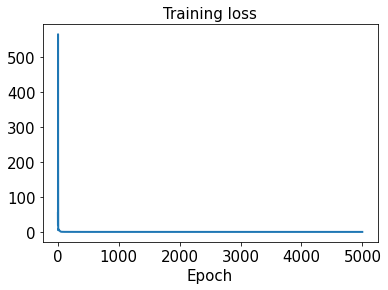

In [9]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

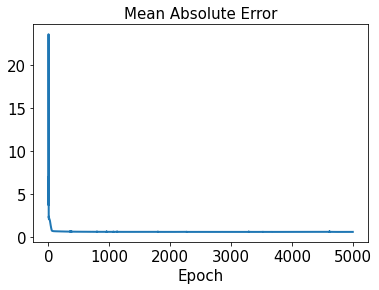

In [10]:
plt.plot(hist['mae'], lw=2)
plt.title('Mean Absolute Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [11]:
test_results = autoencoder.evaluate([x_test, tsr_test])

1/1 [==============================] - 0s 129ms/step - loss: 0.0102 - mae: 0.0000e+00 - mape: 0.0000e+00 - rmse: 0.0000e+00 - msle: 0.0000e+00


In [12]:
decoded_imgs = autoencoder.predict([x_test, tsr_test])

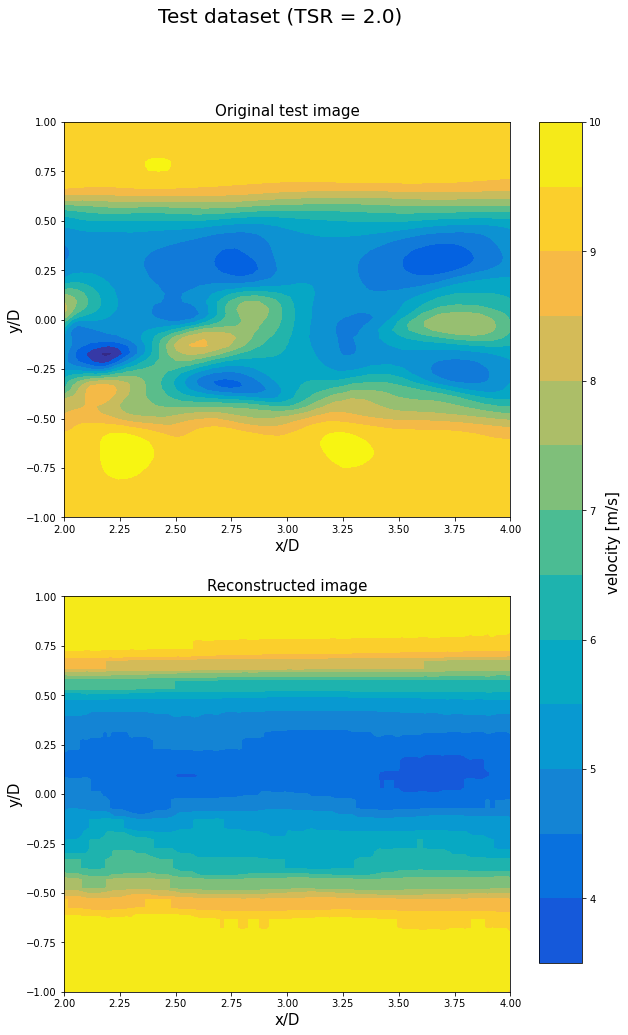

In [13]:
plt.figure(figsize=(8, 16))
xtest_rotate = x_test.T.reshape(100, 100)
decoded_rotate = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(2, 1, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, xtest_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(2, 1, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.075, 0.73])
cbar = plt.colorbar(a2, cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)
cbar.set_ticks([3, 4, 5, 6, 7, 8, 9, 10])

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [14]:
error_test = np.abs(decoded_imgs - x_test) / x_test * 100
print(error_test)

[[[[4.738732 ]
   [1.7487992]
   [1.7306067]
   ...
   [2.2872066]
   [2.3151624]
   [3.9654481]]

  [[2.0608413]
   [1.3253465]
   [1.3040302]
   ...
   [1.6244355]
   [1.652208 ]
   [1.9497964]]

  [[2.0501077]
   [1.3104231]
   [1.2901797]
   ...
   [1.6180294]
   [1.6457984]
   [1.9412197]]

  ...

  [[2.5648189]
   [1.8996428]
   [1.951669 ]
   ...
   [2.1730757]
   [2.1230924]
   [2.9147358]]

  [[2.5484817]
   [1.8823093]
   [1.9191425]
   ...
   [2.2285569]
   [2.178509 ]
   [2.9694698]]

  [[3.4213607]
   [2.219873 ]
   [2.2687669]
   ...
   [2.9519596]
   [2.8927732]
   [4.4129725]]]]


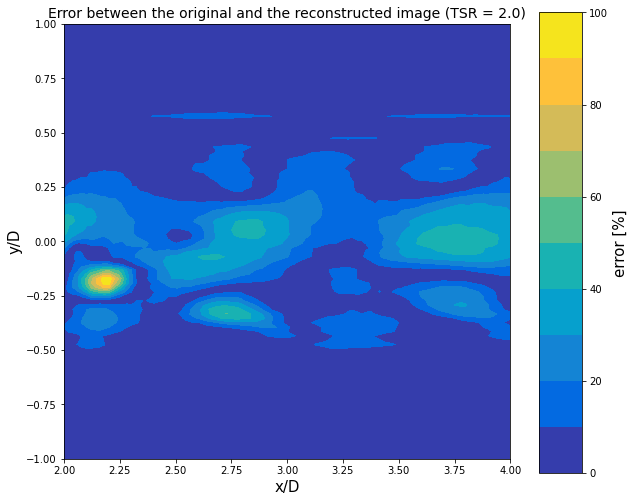

In [15]:
error_test_rotate = error_test.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 2.0)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

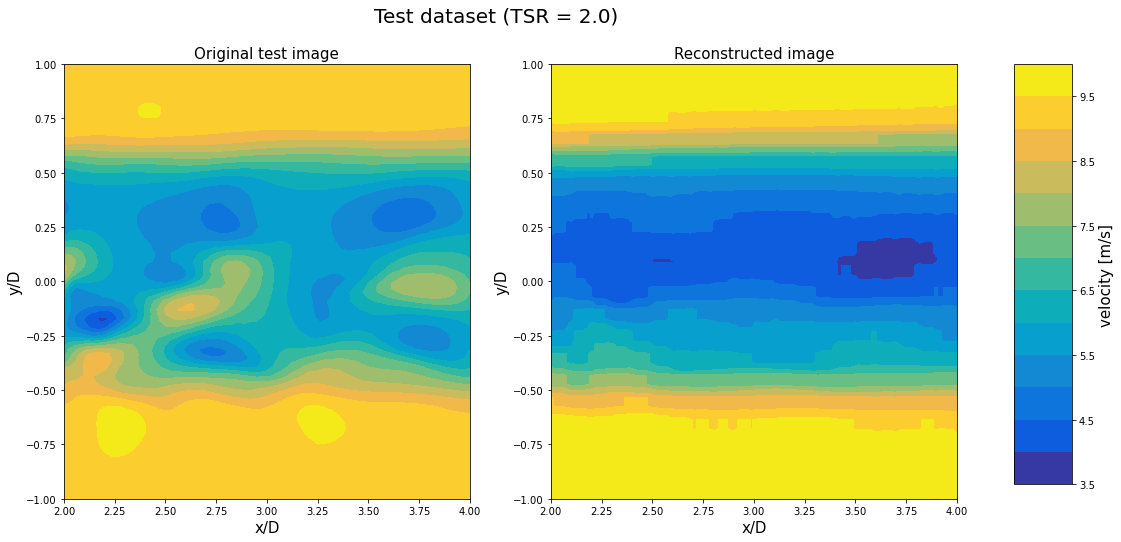

In [16]:
plt.figure(figsize=(16, 8))
xtest_rotate2 = x_test.T.reshape(100, 100)
decoded_rotate2 = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, xtest_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, decoded_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [17]:
train0 = x_train[0].reshape(1, 100, 100, 1)
train_decode0 = autoencoder.predict([train0, tsr_train[0]]).reshape(100, 100)
print(train_decode0.shape)

(100, 100)


In [18]:
train0_orig = x_train[0].reshape(100, 100)

In [19]:
error_train0 = np.abs(train_decode0 - train0_orig) / train0_orig * 100

In [20]:
print(error_train0)

[[4.3360057 2.1929228 2.188597  ... 2.7136219 2.6821933 3.6727111]
 [2.5822573 1.8590612 1.8676825 ... 2.0545168 2.0254462 2.2713292]
 [2.6550028 1.9496415 1.959359  ... 2.0512815 2.0222125 2.2659383]
 ...
 [4.517359  3.919277  4.0501366 ... 2.1524255 2.1144023 2.919108 ]
 [4.5694537 3.969998  4.0885544 ... 2.1165774 2.0883412 2.8939557]
 [1.4522606 4.38607   4.5142198 ... 2.7461874 2.7079692 4.5602417]]


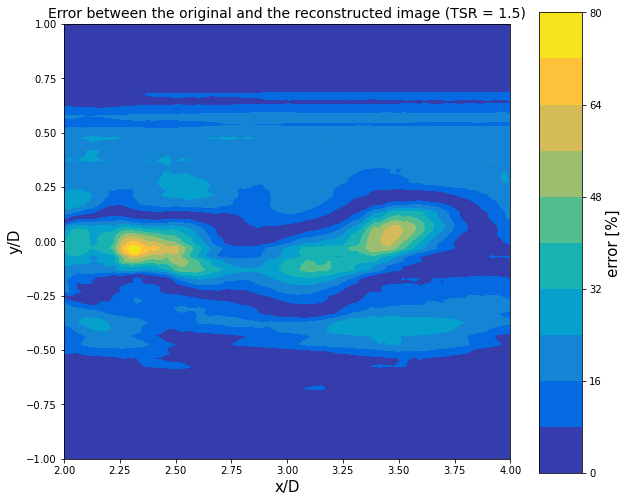

In [21]:
error_train0_rotate = error_train0.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train0_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 1.5)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

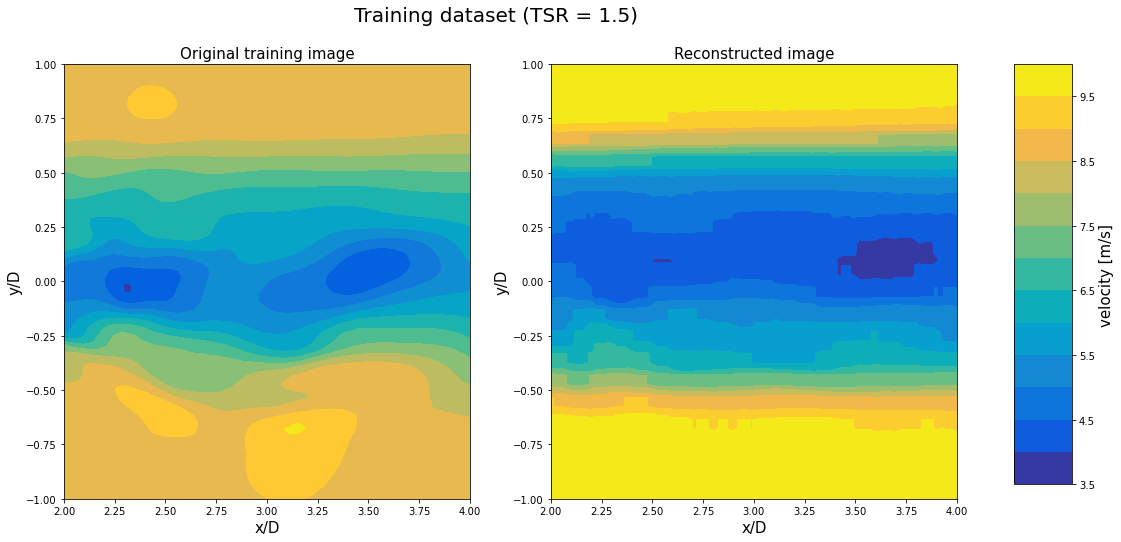

In [22]:
plt.figure(figsize=(16, 8))
#xtest_rotate2 = x_test.T.reshape(100, 100)
#decoded_rotate2 = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train0_orig, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original training image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train_decode0, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Training dataset (TSR = 1.5)',fontsize=20)
plt.show()

In [23]:
print(np.mean(error_train0))

11.245699


In [24]:
print(np.max(error_train0))

76.78795


In [25]:
print(np.mean(error_test))

8.497923


In [26]:
print(np.max(error_test))

97.87555
